In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

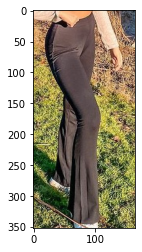

In [105]:
img = cv2.imread('../DATA/Schlaghose2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.GaussianBlur(img,(5,5),0)
#ret,thresh1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY)
#img = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
#img = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(img)

In [1]:
img = cv2.imread('../DATA/pants.jpg',0)

img = cv2.GaussianBlur(img,(5,5),0)
 
lower = int(max(0 ,0.7*med_val))
upper = int(min(255,1.3*med_val))
edges_high_thresh = cv2.Canny(img, lower, upper)
edge_img = np.zeros(edges_high_thresh.shape, dtype=np.uint8) + edges_high_thresh

plt.imshow(edge_img, cmap='gray')

NameError: name 'cv2' is not defined

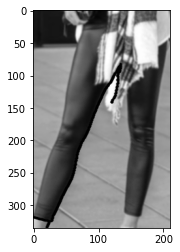

In [109]:
contours, hierarchy = cv2.findContours(
        edge_img,
        cv2.RETR_TREE,
        cv2.CHAIN_APPROX_SIMPLE
    )
level1Meta = []
for contourIndex, tupl in enumerate(hierarchy[0]):
    # Filter the ones without parent
    if tupl[3] == -1:
        tupl = np.insert(tupl.copy(), 0, [contourIndex])
        level1Meta.append(tupl)
        
contoursWithArea = []
for tupl in level1Meta:
    contourIndex = tupl[0]
    contour = contours[contourIndex]
    area = cv2.contourArea(contour)
    contoursWithArea.append([contour, area, contourIndex])
    
contoursWithArea.sort(key=lambda meta: meta[1], reverse=True)
largestContour = contoursWithArea[4][0]

contourImg = np.copy(img)
cv2.drawContours(contourImg, [largestContour], 0, (0, 255, 0), 2, cv2.LINE_AA, maxLevel=1)

plt.imshow(contourImg,cmap='gray')

In [81]:
largestContour

array([[[96,  0]],

       [[96,  5]],

       [[97,  6]],

       ...,

       [[97,  7]],

       [[97,  6]],

       [[96,  5]]], dtype=int32)